<a href="https://colab.research.google.com/github/NeuronsUII/Pathologies_ArtDental_n/blob/main/Kotov%20Alexander/colab_github_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_DICOM_(SimpleITK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Работа с DICOM-снимками: отображение аксиального, коронального, сагиттального срезов.


---
**DICOM** (Digital Imaging and Communications in Medicine), [документация](https://www.dicomstandard.org/current), [viewer](https://viewer.imv-ms.com/ru/).

[**SimpleITK**](https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/) - библиотека для анализа и обработки изображений (поддерживает формат DICOM!)


---



In [ ]:
# Инсталляция библиотек
!pip -qq install SimpleITK  # инсталляция SimpleITK для работы с DICOM-снимками

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.3 MB/s eta 0:00:00


In [ ]:
# Импортируем библиотеки
from google.colab import drive  # для работы с Google Drive
import numpy as np              # для работы с массивами данных
import matplotlib.pyplot as plt # для отрисовки снимков
import SimpleITK as sitk        # для работы с DICOM-файлами

In [ ]:
# Монтируем Google Диск в среде Colaboratory
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Функция загрузки серии снимков DICOM
def load_dicom_series(directory):
    reader = sitk.ImageSeriesReader()
    dicom_series = reader.GetGDCMSeriesFileNames(directory)
    reader.SetFileNames(dicom_series)
    image = reader.Execute()
    return image

In [ ]:
# Указываем путь к DICOM-файлам на Google Диске
dicom_directory = "drive/MyDrive/DICOM/ABAKUMOVA E.A., 19"
# Загрузка DICOM-серии
dicom_image = load_dicom_series(dicom_directory)
print('Загружено:', dicom_image.GetSize()[2],'файлов (срезов) размером', dicom_image.GetSize()[0],'x',dicom_image.GetSize()[1])

Загружено: 576 файлов (срезов) размером 768 x 768


In [ ]:
# Функция отображения срезов
def plot_slices(image, axial_slice, coronal_slice, sagittal_slice, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice - аксиальный срез
    axial_view = image[:, :, dicom_image.GetSize()[2] - axial_slice]
    axial_array = sitk.GetArrayViewFromImage(axial_view)
    axes[0].imshow(axial_array, cmap="gray")
    axes[0].set_title(f"Аксиальный срез: {axial_slice}")
    axes[0].axis("off")

    # Coronal slice - корональный срез
    coronal_view = image[:, coronal_slice, :]
    coronal_array = sitk.GetArrayViewFromImage(coronal_view)
    coronal_array_flipped = np.flipud(coronal_array)  # зеркальное отображение по вертикали
    axes[1].imshow(coronal_array_flipped, cmap="gray")
    axes[1].set_title(f"Корональный срез: {coronal_slice}")
    axes[1].axis("off")

    # Sagittal slice - сагиттальный срез
    sagittal_view = image[sagittal_slice, :, :]
    sagittal_array = sitk.GetArrayViewFromImage(sagittal_view)
    sagittal_array_flipped = np.flipud(sagittal_array)  # зеркальное отображение по вертикали
    axes[2].imshow(sagittal_array_flipped, cmap="gray")
    axes[2].set_title(f"Сагиттальный срез: {sagittal_slice}")
    axes[2].axis("off")

    plt.suptitle(title)
    plt.show()

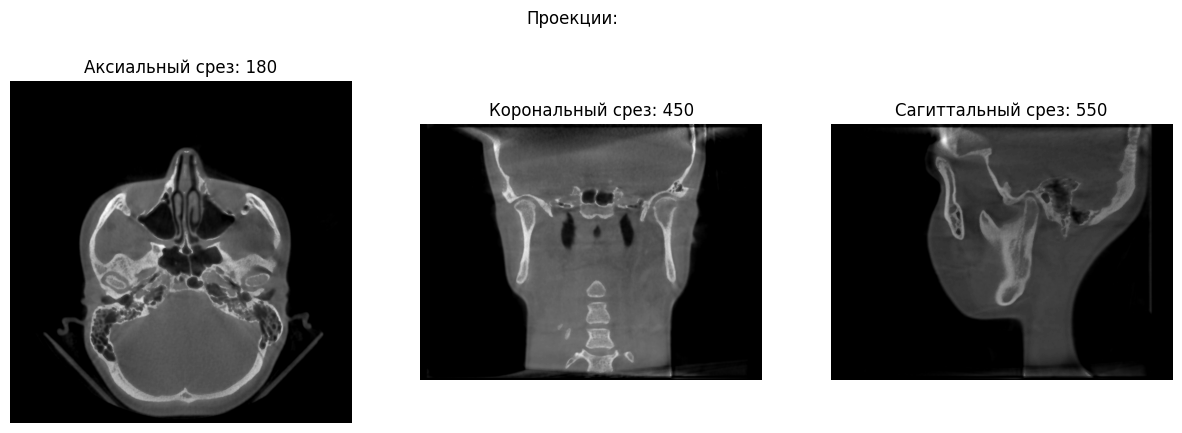

In [ ]:
# Укажите номера срезов для каждой ориентации
axial_slice_number    = 180
coronal_slice_number  = 450
sagittal_slice_number = 550

# Отображение срезов в различных ориентациях
plot_slices(dicom_image, axial_slice_number, coronal_slice_number, sagittal_slice_number, 'Проекции:')

### Виды срезов


---



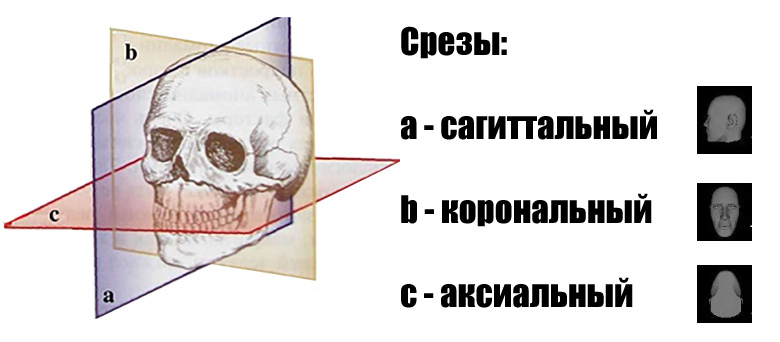